In [1]:
! pip install scikit-learn==1.7.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 98.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [2]:
# basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
# filter warnings
warnings.filterwarnings('ignore')

In [4]:
# load drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Datasets/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
df.shape

(2200, 8)

In [7]:
df.size

17600

In [8]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [11]:
columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

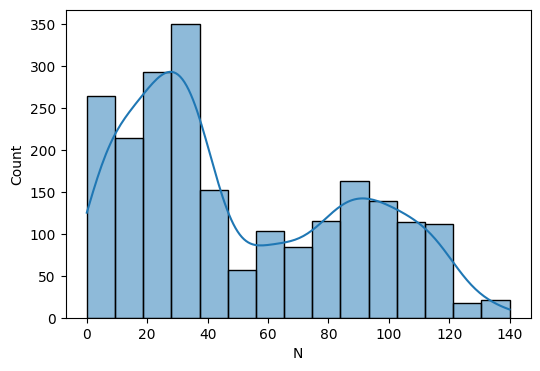

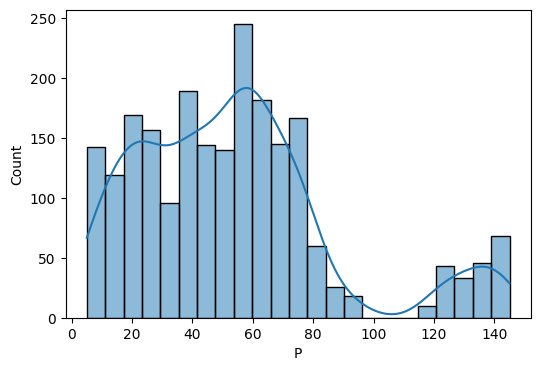

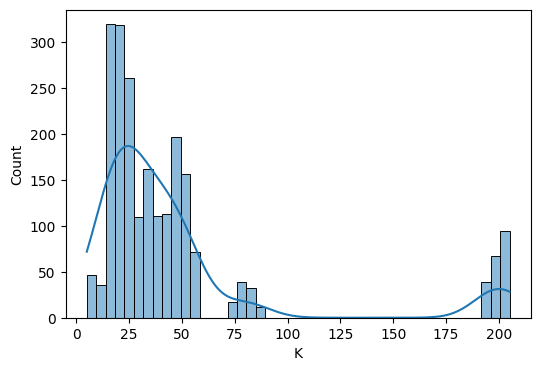

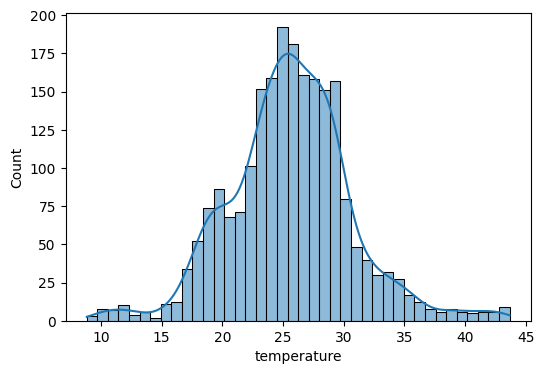

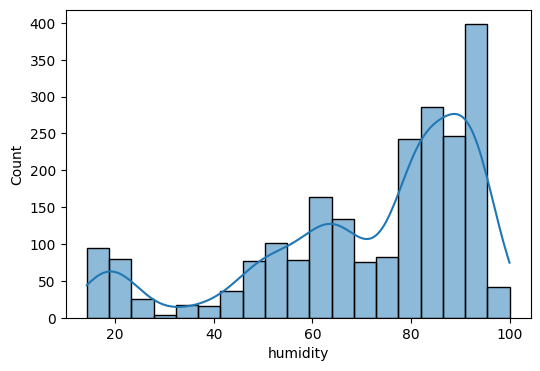

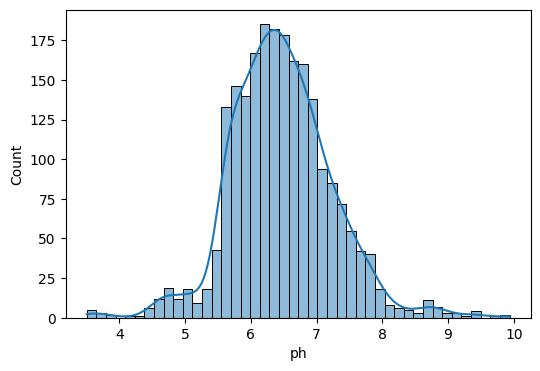

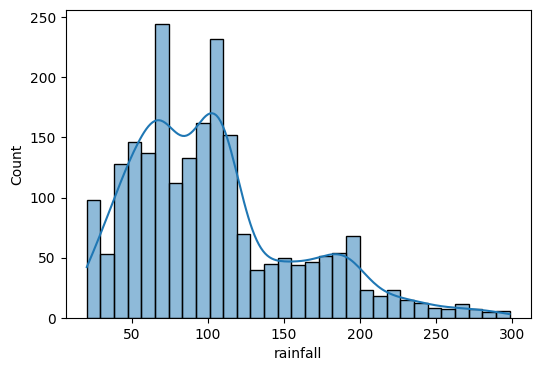

In [12]:
for col in columns:
    plt.figure(figsize = (6,4))
    sns.histplot(x = df[col], kde = True)

<Axes: xlabel='count', ylabel='label'>

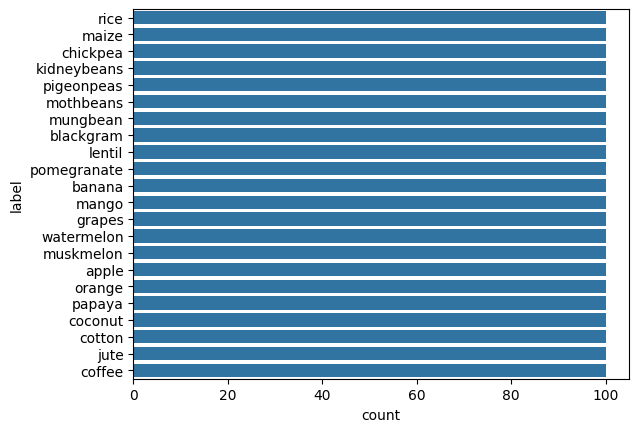

In [13]:
sns.countplot(data = df, y = df['label'])

In [14]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [15]:
df['label'].nunique()

22

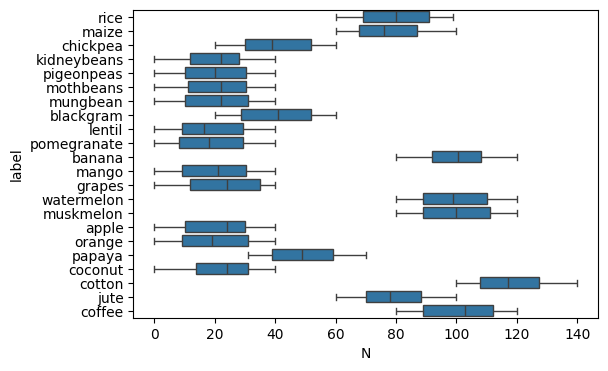

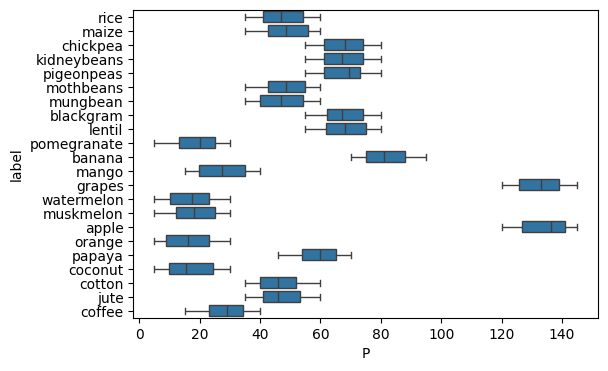

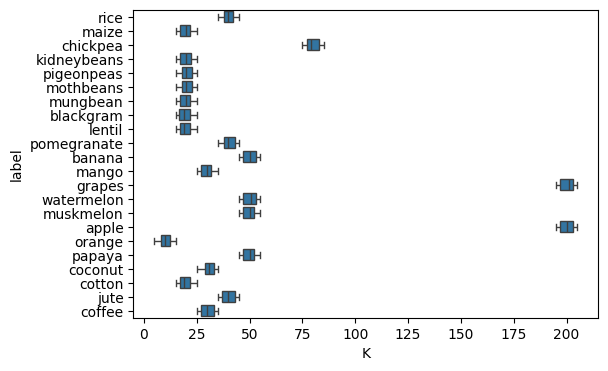

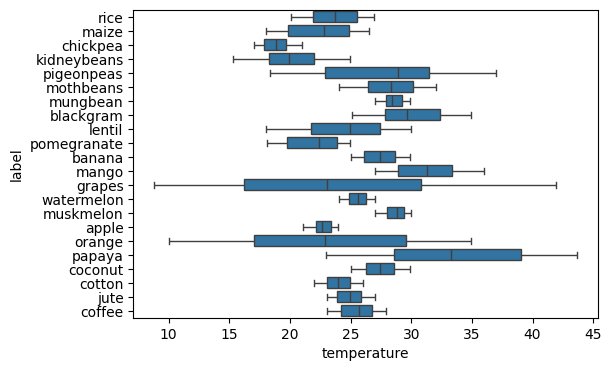

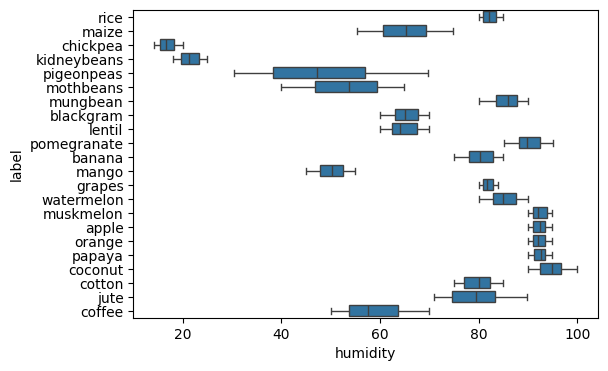

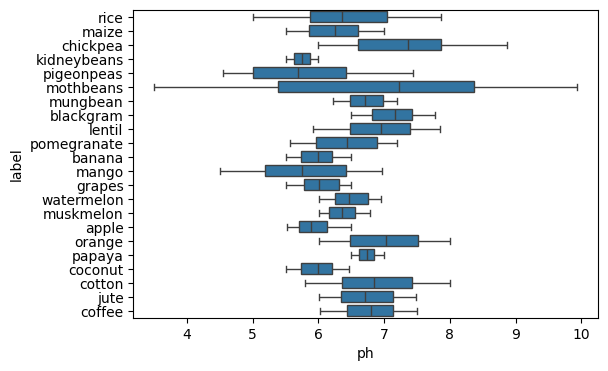

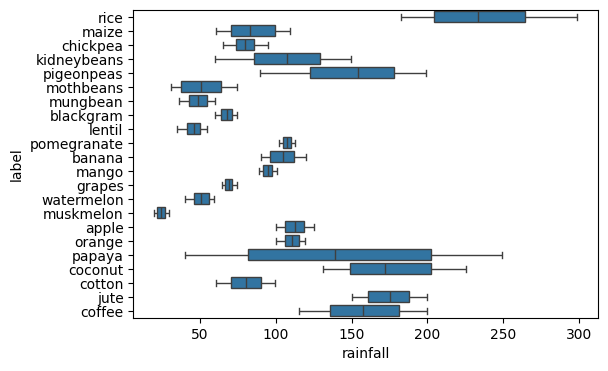

In [16]:
for col in columns:
    plt.figure(figsize = (6,4))
    sns.boxplot(data = df, x = df[col], y = df['label'])

<Axes: >

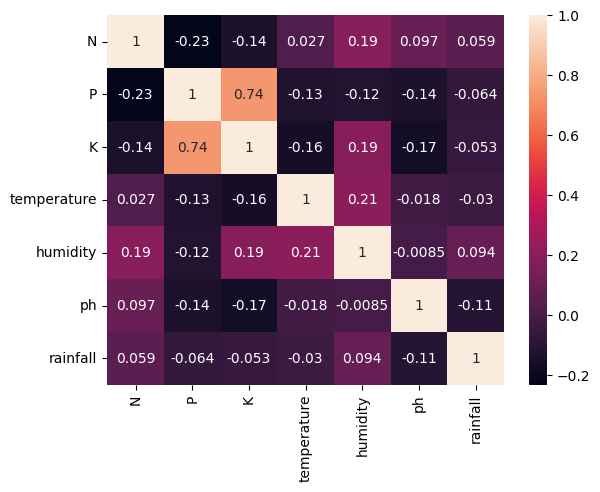

In [17]:
# correlation
sns.heatmap(df.corr(numeric_only = True), annot = True)

In [18]:
df_copy = df.copy()

In [19]:
df_copy.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [20]:
df_copy.shape

(2200, 8)

In [21]:
df_copy = df_copy.drop_duplicates()

In [22]:
df_copy.shape

(2200, 8)

In [23]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [24]:
X = df_copy.drop(columns = ['label'], axis = 1)
y = df_copy['label']

In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()

In [26]:
# encoding y
y_encoded = encoder.fit_transform(y)

In [27]:
y_encoded

array([20, 20, 20, ...,  5,  5,  5])

In [28]:
# mapping
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
label_mapping

{'apple': np.int64(0),
 'banana': np.int64(1),
 'blackgram': np.int64(2),
 'chickpea': np.int64(3),
 'coconut': np.int64(4),
 'coffee': np.int64(5),
 'cotton': np.int64(6),
 'grapes': np.int64(7),
 'jute': np.int64(8),
 'kidneybeans': np.int64(9),
 'lentil': np.int64(10),
 'maize': np.int64(11),
 'mango': np.int64(12),
 'mothbeans': np.int64(13),
 'mungbean': np.int64(14),
 'muskmelon': np.int64(15),
 'orange': np.int64(16),
 'papaya': np.int64(17),
 'pigeonpeas': np.int64(18),
 'pomegranate': np.int64(19),
 'rice': np.int64(20),
 'watermelon': np.int64(21)}

In [29]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [30]:
# scale X
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [31]:
# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size = 0.3, stratify = y_encoded, random_state = 42)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

In [33]:
# multiple models
models = {
    'LogisticRegression': LogisticRegression(max_iter = 1000),
    'KNN': KNeighborsClassifier(n_neighbors = 5),
    'DecisionTree': DecisionTreeClassifier(),
    'NaiveBayes': GaussianNB(),
    'SVM': SVC(kernel = 'rbf')
}

In [34]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average = 'macro')

    results.append({
        'Model': name,
        'Accuracy_score': round(acc_score, 4),
        'F1_score':round(f1, 4)
    })

In [35]:
results

[{'Model': 'LogisticRegression', 'Accuracy_score': 0.9727, 'F1_score': 0.9725},
 {'Model': 'KNN', 'Accuracy_score': 0.9788, 'F1_score': 0.9786},
 {'Model': 'DecisionTree', 'Accuracy_score': 0.9758, 'F1_score': 0.9757},
 {'Model': 'NaiveBayes', 'Accuracy_score': 0.9924, 'F1_score': 0.9924},
 {'Model': 'SVM', 'Accuracy_score': 0.9894, 'F1_score': 0.9894}]

In [36]:
results_df = pd.DataFrame(results, columns = ["Model", "Accuracy_score", "F1_score"])

In [37]:
results_df

,Model,Accuracy_score,F1_score
0,LogisticRegression,0.9727,0.9725
1,KNN,0.9788,0.9786
2,DecisionTree,0.9758,0.9757
3,NaiveBayes,0.9924,0.9924
4,SVM,0.9894,0.9894


In [38]:
results_df.sort_values(by = "Accuracy_score", ascending = False)[["Model", "Accuracy_score", "F1_score"]]

,Model,Accuracy_score,F1_score
3,NaiveBayes,0.9924,0.9924
4,SVM,0.9894,0.9894
1,KNN,0.9788,0.9786
2,DecisionTree,0.9758,0.9757
0,LogisticRegression,0.9727,0.9725


In [39]:
# cross validation score
from sklearn.model_selection import cross_val_score

In [40]:
cv_scores = []
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv = 5, scoring = "accuracy")
    cv_scores.append({
        "Model": name,
        "Accuracy_Mean": round(scores.mean(), 4),
        "Accuracy_Std": round(scores.std(), 4)
    })

In [41]:
cv_results = pd.DataFrame(cv_scores, columns = ["Model", "Accuracy_Mean", "Accuracy_Std"])

In [42]:
cv_results.sort_values(by = "Accuracy_Mean", ascending = False)[["Model", "Accuracy_Mean", "Accuracy_Std"]]

,Model,Accuracy_Mean,Accuracy_Std
3,NaiveBayes,0.9950,0.0022
2,DecisionTree,0.9873,0.0042
4,SVM,0.9823,0.0017
0,LogisticRegression,0.9714,0.0099
1,KNN,0.9714,0.0059


In [43]:
# confusion matrix
from sklearn.metrics import confusion_matrix

In [44]:
for name, model in models.items():
    cm = confusion_matrix(y_test, y_pred)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Confusion Matrix for {name}: \n")
    print(cm)

Confusion Matrix for LogisticRegression: 

[[30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 29  0  0  0  0  0  

In [45]:
y_test

array([ 9, 13,  2,  8,  8,  9, 17, 12,  5, 11, 20, 17,  4, 16, 12,  1, 10,
        3,  2,  6, 12, 15,  1,  9, 18, 17,  8, 12,  9,  7, 13,  8, 14, 19,
       13, 20,  9,  6,  2,  7, 13,  0,  4, 21,  6,  9, 11,  3, 16,  6, 12,
        9, 15, 10,  0,  1,  0, 11,  1,  4, 10,  3,  1, 18,  4, 20, 18, 17,
        5, 20, 16, 21,  5,  1,  3,  8, 15, 18, 11,  2,  7,  6,  7, 16,  3,
        2, 18, 20,  5,  4, 10, 21,  7,  7,  1,  7,  0, 19, 14, 17,  8,  1,
        5, 15, 18,  3,  7, 21, 19, 17, 16, 13, 19,  7,  8, 21, 12, 20,  6,
       13, 14, 18, 16,  7, 15, 12,  4,  6, 13,  3, 19, 19, 16,  9,  9, 20,
       14, 21, 18,  0, 11, 12, 16,  5, 17,  5,  8,  7, 12, 16,  8,  9, 15,
       19,  9, 10, 10, 17, 19,  9, 11, 10,  2,  4, 16, 15,  5,  9, 10, 21,
       20,  3,  7, 13,  0, 21, 21, 18, 14,  8,  5, 17, 11,  8,  8,  1, 13,
        3, 11,  4,  2, 18,  5, 17, 12, 21, 15, 15, 21, 15,  0,  2, 16, 13,
       21, 19,  4, 20, 15, 11,  9, 15, 14,  0, 11, 12,  9, 19, 13,  0,  7,
       21,  4,  6, 14, 10

In [46]:
y_pred

array([ 9, 13,  2,  8,  8,  9, 17, 12,  5, 11, 20, 17,  4, 16, 12,  1, 10,
        3,  2,  6, 12, 15,  1,  9, 18, 17,  8, 12,  9,  7, 12,  8, 14, 19,
       13, 20,  9,  6,  2,  7, 13,  0,  4, 21,  6,  9, 11,  3, 16,  6, 12,
        9, 15, 10,  0,  1,  0, 11,  1,  4, 10,  3,  1, 18,  4, 20, 18, 17,
        5, 20, 16, 21,  5,  1,  3,  8, 15, 18, 11,  2,  7,  6,  7, 16,  3,
        2, 18,  8,  5,  4, 10, 21,  7,  7,  1,  7,  0, 19, 14, 17,  8,  1,
        5, 15, 18,  3,  7, 21, 19, 17, 16, 13, 19,  7,  8, 21, 12, 20,  6,
       13, 14, 18, 16,  7, 15, 12,  4,  6, 13,  3, 19, 19, 16,  9,  9,  8,
       14, 21, 18,  0, 11, 12, 16,  5, 17,  5,  8,  7, 12, 16,  8,  9, 15,
       19,  9, 10, 10, 17, 19,  9, 11, 10,  2,  4, 16, 15,  5,  9, 10, 21,
        8,  3,  7, 13,  0, 21, 21, 18, 14,  8,  5, 17, 11,  8,  8,  1, 13,
        3, 11,  4,  2, 18,  5, 17, 12, 21, 15, 15, 21, 15,  0,  2, 16, 13,
       21, 19,  4, 20, 15,  6,  9, 15, 14,  0, 11, 12,  9, 19, 13,  0,  7,
       21,  4,  6, 14, 10

In [47]:
# download models
import joblib
joblib.dump(models["NaiveBayes"], "model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns.tolist(), "columns.pkl")

['columns.pkl']

In [48]:
joblib.dump(encoder, "encoder.pkl")

['encoder.pkl']